# 3.2.2 Deep analysis of DB_BLOCKS and DB_CPU_TIME

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.display import HTML

In [2]:
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""") 

### Loadind Data

In [3]:
source_path_reports = "data/Salesforce/ELF/Report/2022-06-20_Report.csv"

reports = pd.read_csv(source_path_reports)

In [4]:
source_path_pg_view = "data/Salesforce/ELF/LightningPageView/2022-06-20_LightningPageView.csv"

page_view = pd.read_csv(source_path_pg_view)

## 1. What is the average DB_TOTAL_TIME of our sample?

### 1.1 DB_TOTAL_TIME to fetch report data

In [5]:
reports1 = reports.sort_values(by=['DB_TOTAL_TIME'], ascending=False)
reports1['DB_TOTAL_TIME'] = reports1.apply(lambda row: (row['DB_TOTAL_TIME']/1000000), axis=1) #Converting DB TOTAL_TIME value from nanoseconds to milliseconds.

In [6]:
db_tt_mean = reports1['DB_TOTAL_TIME'].mean()
db_tt_median = reports1['DB_TOTAL_TIME'].median()

print(f"Mean = {db_tt_mean:.2f} miliseconds")
print(f"Median = {db_tt_median:.2f} miliseconds")

Mean = 5088.08 miliseconds
Median = 1217.16 miliseconds


In [7]:
above_mean = reports1['DB_TOTAL_TIME'].apply(lambda value: value > db_tt_mean)
above_median = reports1['DB_TOTAL_TIME'].apply(lambda value: value > db_tt_median)

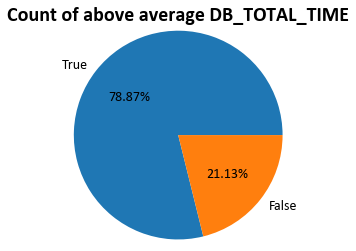

In [8]:
plt.pie(above_mean.value_counts(), autopct='%1.2f%%', radius=1.2, 
        labels = above_mean.unique(), textprops = {'size': 14, 'font': 'Calibri'})

plt.title( 'Count of above average DB_TOTAL_TIME', fontsize=20, fontweight="bold", fontname="Calibri");
plt.show()

### 1.2 DB_TOTAL_TIME by components

In [9]:
merged_data = pd.merge(left = reports1, right = page_view, on='SESSION_KEY', how= 'inner')

In [10]:
db_tt_mean = merged_data['DB_TOTAL_TIME'].mean()
db_tt_median = merged_data['DB_TOTAL_TIME'].median()

print(f"Mean = {db_tt_mean:.2f} miliseconds")
print(f"Median = {db_tt_median:.2f} miliseconds")

Mean = 3773.76 miliseconds
Median = 239.63 miliseconds


In [11]:
above_mean = reports1['DB_TOTAL_TIME'].apply(lambda value: value > db_tt_mean)
above_median = reports1['DB_TOTAL_TIME'].apply(lambda value: value > db_tt_median)

above_mean_md = merged_data[merged_data.DB_TOTAL_TIME > db_tt_mean]
above_median_md = merged_data[merged_data.DB_TOTAL_TIME > db_tt_median]

In [12]:
amount_data = 10

data_dict1 = above_mean_md.groupby("PAGE_CONTEXT")['DB_TOTAL_TIME'].sum()
 
sorted_data_dict1 = {k: v for k, v in sorted(data_dict1.items(), key=lambda item: item[1], reverse = True)}

y_axis1 = [ pg_context for pg_context in list(sorted_data_dict1.keys())[:20] ]

x_axis1 = list(sorted_data_dict1.values())[:20]

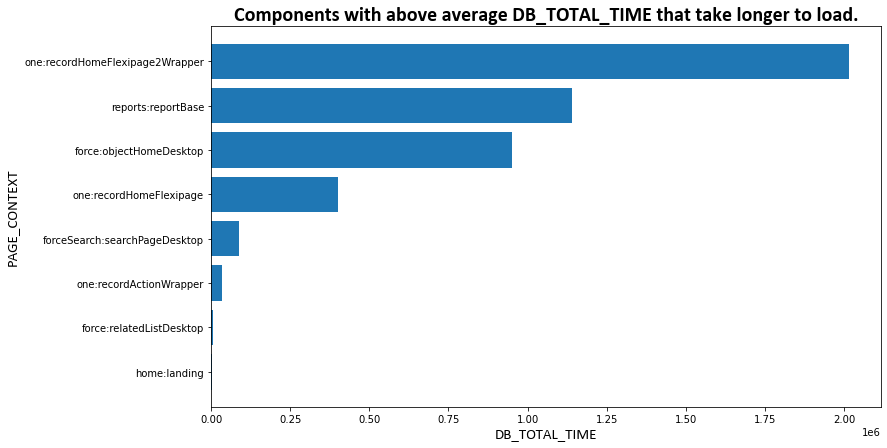

In [13]:

df = pd.DataFrame ({
        'pg_context': y_axis1,
        'db_tt': x_axis1
})

df = df.sort_values(by=['db_tt'])

plt.figure(figsize=(12,7))


plt.barh(y=df.pg_context, width=df.db_tt);

plt.xlabel('DB_TOTAL_TIME', fontsize=15, fontname="Calibri")
plt.ylabel('PAGE_CONTEXT', fontsize=15, fontname="Calibri")

plt.title('Components with above average DB_TOTAL_TIME that take longer to load.', fontsize=20, fontweight="bold", fontname="Calibri");

plt.show()

## 2. What is the average CPU_TIME?

### 2.1 CPU_TIME by report data

In [14]:
reports2 = reports.sort_values(by=['CPU_TIME'], ascending=False)

In [15]:
db_cpt_mean2 = reports2['CPU_TIME'].mean()
db_cpt_median2 = reports2['CPU_TIME'].median()

print(f"Mean = {db_cpt_mean2:.2f} miliseconds")
print(f"Median = {db_cpt_mean2:.2f} miliseconds")

Mean = 330.57 miliseconds
Median = 330.57 miliseconds


In [16]:
above_mean2 = reports2['CPU_TIME'].apply(lambda value: value > db_cpt_mean2)
above_median2 = reports2['CPU_TIME'].apply(lambda value: value > db_cpt_median2)

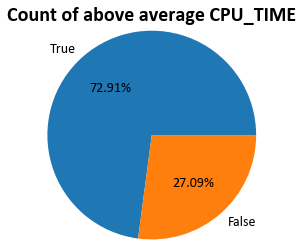

In [17]:
plt.pie(above_mean2.value_counts(), autopct='%1.2f%%', radius=1.2, 
        labels = above_mean.unique(), textprops = {'size': 14, 'font': 'Calibri'})

plt.title( 'Count of above average CPU_TIME', fontsize=20, fontweight="bold", fontname="Calibri");
plt.show()

### 2.1 CPU_TIME by component

In [19]:
merged_data2 = pd.merge(left = reports2, right = page_view, on='SESSION_KEY', how= 'inner')

In [23]:
db_tt_mean2 = merged_data2['CPU_TIME'].mean()
db_tt_median2 = merged_data2['CPU_TIME'].median()

print(f"Mean = {db_tt_mean2:.2f} miliseconds")
print(f"Median = {db_tt_median2:.2f} miliseconds")

Mean = 389.22 miliseconds
Median = 326.00 miliseconds


In [28]:
above_mean2 = reports2['CPU_TIME'].apply(lambda value: value > db_tt_mean2)
above_median2 = reports2['CPU_TIME'].apply(lambda value: value > db_tt_median2)

above_mean_md2 = merged_data[merged_data.CPU_TIME > db_tt_mean2]
above_median_md2 = merged_data[merged_data.CPU_TIME > db_tt_median2]

In [30]:
amount_data2 = 10

data_dict2 = above_mean_md2.groupby("PAGE_CONTEXT")['CPU_TIME'].sum()
 
sorted_data_dict2 = {k: v for k, v in sorted(data_dict2.items(), key=lambda item: item[1], reverse = True)}

y_axis2 = [ pg_context for pg_context in list(sorted_data_dict2.keys())[:amount_data2] ]

x_axis2 = list(sorted_data_dict2.values())[:amount_data2]

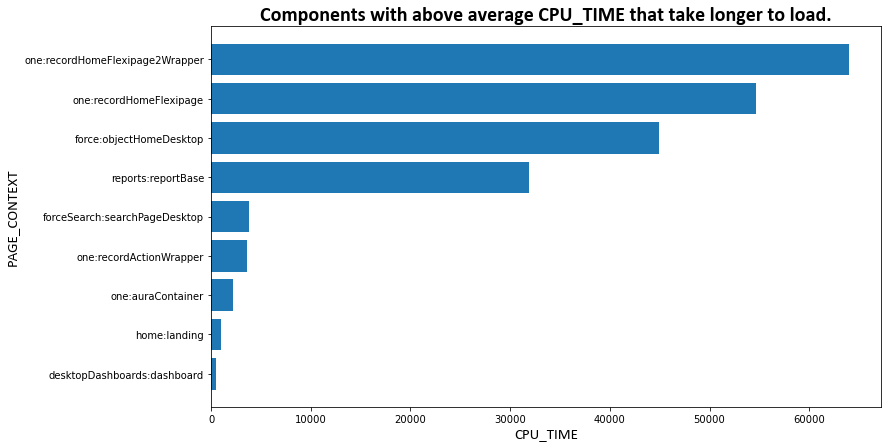

In [33]:
df = pd.DataFrame ({
        'pg_context': y_axis2,
        'db_cpt': x_axis2
})

df = df.sort_values(by=['db_cpt'])

plt.figure(figsize=(12,7))


plt.barh(y=df.pg_context, width=df.db_cpt);

plt.xlabel('CPU_TIME', fontsize=15, fontname="Calibri")
plt.ylabel('PAGE_CONTEXT', fontsize=15, fontname="Calibri")

plt.title('Components with above average CPU_TIME that take longer to load.', fontsize=20, fontweight="bold", fontname="Calibri");

plt.show()